# This is Alphabates Prediction From (A-J) respect to (0-9) numbers.


*   here, I have traied 112 images for each and every alphabate.
*   This is not Mnist data set.



**All Required Libraries to work done.**

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import pickle

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

**i all cleaned my dataset so i just load it back
if you want to know more about the cleaning,reshaping,and Type Conversion you can check out the
https://github.com/rizwan777/ML-DS-DA/blob/master/Kaggle_work/NotMnist_A2J.ipynb file it will help you to batter understanding.

In [2]:
X_features = pickle.load(open("../input/cleandata/X_features.pickle","rb"))
Y_labels = pickle.load(open("../input/cleandata/Y_labels.pickle","rb"))

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_features, Y_labels, test_size=0.2, random_state=13)

In [4]:
len(X_train),len(X_val),len(y_train),len(y_val)
# totally 1120 images From 896 image for X_train, 224 imge for X_val

(896, 224, 896, 224)

**Just Verifying the dataset is loaded properly and also its check for the shape.**

In [5]:
X_train[10].shape, y_train[10]

((100, 100), 4)

**lets open any random image from the dataset**

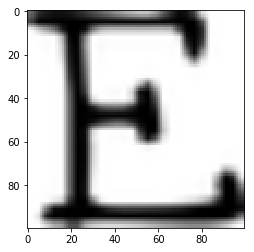

In [6]:
plt.imshow(np.squeeze(X_train[10]),cmap="binary")
plt.show()
# yeah features of array with label match correctly .. here [A-J] match with[0-9]

**In First Line we need to reshape the size of the image to fit well as input.
we need to pass again three args overhear also otherwise its just make it single vector array.**

In [7]:
X_features = np.array(X_train).reshape(-1,100,100,1) 
# we need to pass again three args overhear also otherwise its just make it single vector array.
Y_labels = np.array(y_train).reshape(-1)
X_features.shape, Y_labels.shape

((896, 100, 100, 1), (896,))

In [8]:
np.max(X_features[10])

255

* **Below code will inable the GPU processing and it will used half of the memory to perform the operation.**

In [9]:
for i in Y_labels[20:30]:
    print(i)

9
9
0
8
6
1
7
4
5
8


In [10]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
sess = tf.Session(config = tf.ConfigProto(gpu_options=gpu_options))
# normalization of data for easy to calculations.
X_features = X_features/255.0

In [35]:
# i dont want to run and test now its take time to train the data.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Activation,MaxPool2D,Dropout,Flatten
model = Sequential()
model.add(Conv2D(64,(3,3),padding='same',input_shape=X_features.shape[1:]))
model.add(Activation('tanh'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('tanh'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(Activation('tanh'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('tanh'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dense(64))
model.add(Activation('tanh'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss="sparse_categorical_crossentropy",optimizer="RMSprop",metrics=['accuracy'])


In [36]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 100, 100, 64)      640       
_________________________________________________________________
activation_39 (Activation)   (None, 100, 100, 64)      0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
activation_40 (Activation)   (None, 50, 50, 128)       0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 25, 25, 256)      

In [37]:
history=model.fit(X_features,Y_labels,batch_size=64,epochs=20,validation_split=0.3)

Train on 627 samples, validate on 269 samples
Epoch 1/20
627/627 [==============================] - 1s 2ms/sample - loss: 2.2653 - acc: 0.3014 - val_loss: 1.1643 - val_acc: 0.6245
Epoch 2/20
627/627 [==============================] - 0s 566us/sample - loss: 0.8925 - acc: 0.7384 - val_loss: 0.8421 - val_acc: 0.7584
Epoch 3/20
627/627 [==============================] - 0s 585us/sample - loss: 0.6504 - acc: 0.8166 - val_loss: 0.7769 - val_acc: 0.7844
Epoch 4/20
627/627 [==============================] - 0s 564us/sample - loss: 0.5594 - acc: 0.8373 - val_loss: 0.7089 - val_acc: 0.7918
Epoch 5/20
627/627 [==============================] - 0s 555us/sample - loss: 0.4315 - acc: 0.8772 - val_loss: 0.6772 - val_acc: 0.8216
Epoch 6/20
627/627 [==============================] - 0s 570us/sample - loss: 0.3507 - acc: 0.9059 - val_loss: 0.7116 - val_acc: 0.8067
Epoch 7/20
627/627 [==============================] - 0s 580us/sample - loss: 0.2909 - acc: 0.9203 - val_loss: 0.6782 - val_acc: 0.8030
Epoc

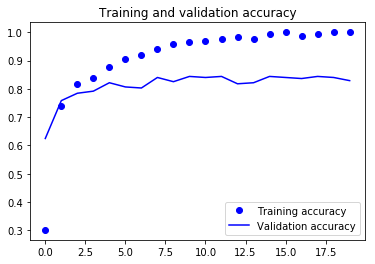

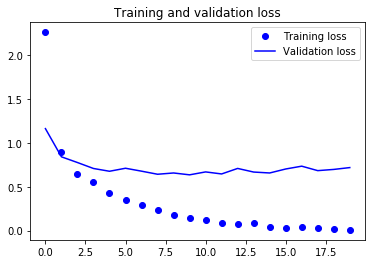

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [39]:
predict = model.predict([X_features])
predict, predict.shape

(array([[1.10429955e-05, 9.93713729e-06, 1.01456726e-02, ...,
         1.71927983e-04, 9.83152859e-07, 1.25083552e-05],
        [2.00124333e-07, 2.46912095e-05, 4.24338668e-06, ...,
         1.41617318e-06, 2.47246935e-05, 9.77447030e-07],
        [5.75018166e-09, 1.54462687e-05, 1.29358864e-06, ...,
         7.78349886e-07, 1.21559960e-05, 3.89604793e-09],
        ...,
        [3.74691263e-06, 9.99132574e-01, 3.28364731e-05, ...,
         3.40289436e-04, 1.58046805e-05, 4.12626804e-08],
        [5.94002995e-05, 9.45521984e-04, 1.21332196e-05, ...,
         7.79756920e-06, 1.53938786e-03, 1.36177300e-06],
        [1.08429804e-05, 1.03685516e-05, 3.33060274e-10, ...,
         6.48727605e-09, 2.76745443e-04, 9.99617577e-01]], dtype=float32),
 (896, 10))

In [43]:
np.argmax(predict[666])  # lets test any number from the Prediction is accurate or not

3

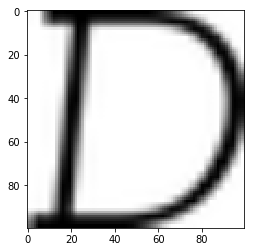

In [45]:
plt.imshow(np.squeeze(X_features[666]),cmap="binary")
plt.show()